# Figure Generation Code: planet_tile2img

In [1]:
import rasterio as rio
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pandas as pd
import numpy as np
import glob

import xarray as xr
import cmocean
import fiona
from matplotlib import colors
from rasterio.plot import show
from rasterio.windows import from_bounds, transform

from datetime import datetime
import csv

In [2]:
FIGPATH = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/figures/' # path to all final figures

## Build Velocity Rastor Comparison Between S2 and PS

In [172]:
# plot all 100m PS imagery to check
# PSfolder = '/Volumes/SURGE_DISK/SR_autorift_output/'
PSfolder = '/Volumes/SURGE_DISK/MZ_autorift_output_dt14to60/'
filelist = glob.glob(PSfolder+'velocity*100m_PS.tif')
filelist.sort()
# filelist

In [173]:
# read in shapefile coordinates
outline = fiona.open('/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/MZ/MZ_polygon_UTM42.shp')
# outline = fiona.open('/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/Turner_RGI/TG_glims_polygon_UTM7.shp')
glacier = outline.next()
coords = glacier['geometry']['coordinates'][0]

/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_11267/4207271962.py:4: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  glacier = outline.next()
ERROR 1: PROJ: proj_identify: Cannot find proj.db


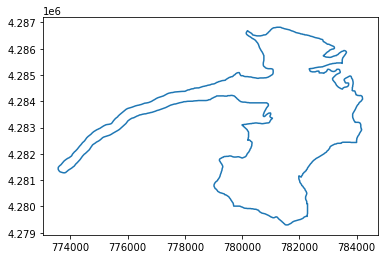

In [174]:
xs = []; ys = []
for coord in coords:
    [x,y,z] = coord
    xs.append(x); ys.append(y)
plt.plot(xs, ys)
plt.show()

In [179]:
# CHOOSE WINDOW BOUDNS FOR THE SITE:

# # window bounds(UTM coordinates - SR):
# left = 713000
# right = 743000
# top = 3.923e6
# bottom = 3.903e6
# yticks_m = np.array([3.903e6, 3.913e6, 3.923e6])
# yticks_km = np.array(yticks_m/1000).astype(int)
# xticks_m = np.array([720e3, 730e3, 740e3])
# xticks_km = np.array(xticks_m/1000).astype(int)


# # window bounds(UTM coordinates - AV):
# left = 429000
# right = 445000
# top = 8.742e6
# bottom = 8.732e6
# yticks_m = np.array([8.732e6, 8.737e6, 8.742e6])
# yticks_km = np.array(yticks_m/1000).astype(int)
# xticks_m = np.array([430e3, 435e3, 440e3, 445e3])
# xticks_km = np.array(xticks_m/1000).astype(int)

# # window bounds (UTM coordinates - SK)
# left = 555000
# right = 583000
# top =  6.675e6
# bottom = 6.650e6
# yticks_m = np.array([6.655e6, 6.665e6, 6.675e6])
# yticks_km = np.array(yticks_m/1000).astype(int)
# xticks_m = np.array([560e3, 570e3, 580e3])
# xticks_km = np.array(xticks_m/1000).astype(int)

# # window bounds (UTM coordinates - LO)
# left = 300000
# right = 335000
# top =  6.705e6
# bottom = 6.672e6
# yticks_m = np.array([6.675e6, 6.685e6, 6.695e6, 6.705e6])
# yticks_km = np.array(yticks_m/1000).astype(int)
# xticks_m = np.array([305e3, 320e3, 335e3])
# xticks_km = np.array(xticks_m/1000).astype(int)

# window bounds (UTM coordinates - MZ)
left = 772000
right = 784000
top =  4.288e6
bottom = 4.279e6
yticks_m = np.array([4.280e6, 4.283e6, 4.286e6])
yticks_km = np.array(yticks_m/1000).astype(int)
xticks_m = np.array([772e3, 776e3, 780e3, 784e3])
xticks_km = np.array(xticks_m/1000).astype(int)

velocity_20200108_20200123_100m_PS.tif


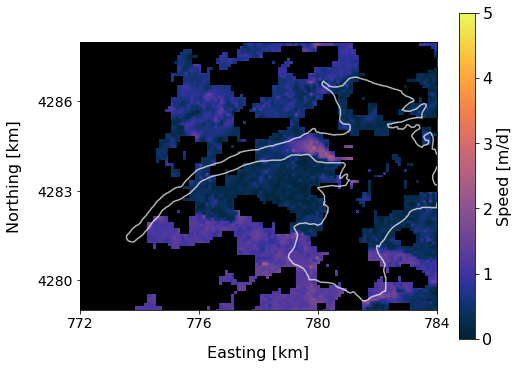

velocity_20200123_20200209_100m_PS.tif


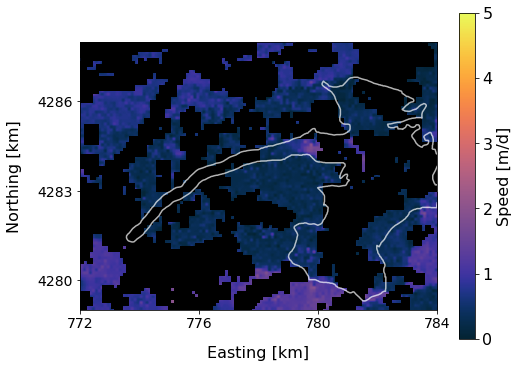

velocity_20200209_20200223_100m_PS.tif


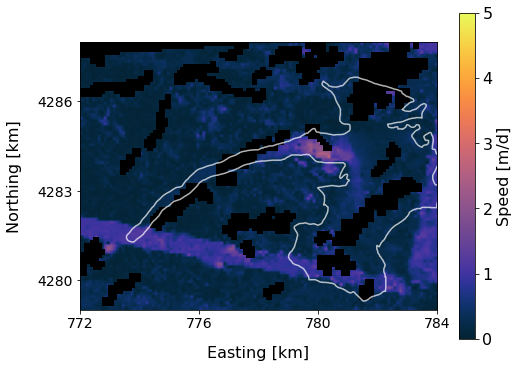

velocity_20200223_20200309_100m_PS.tif


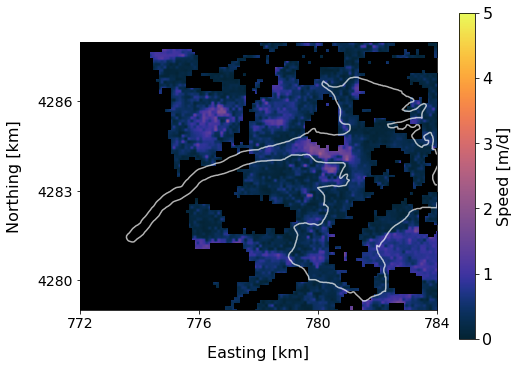

velocity_20200309_20200406_100m_PS.tif


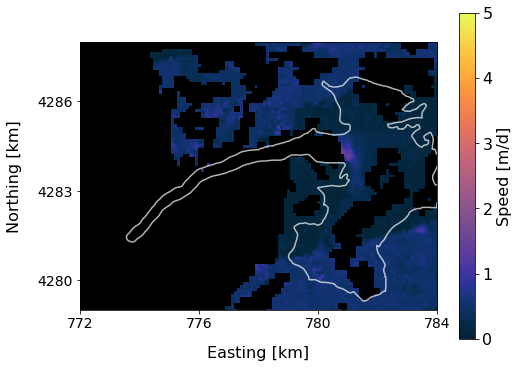

velocity_20200406_20200421_100m_PS.tif


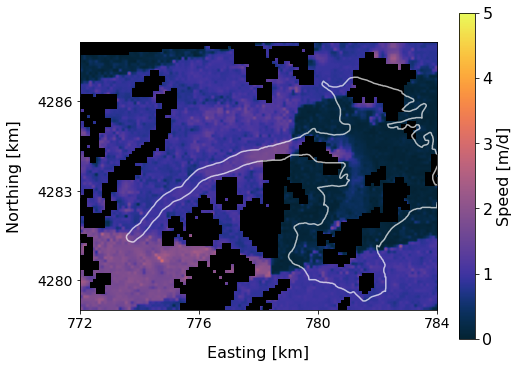

velocity_20200421_20200507_100m_PS.tif


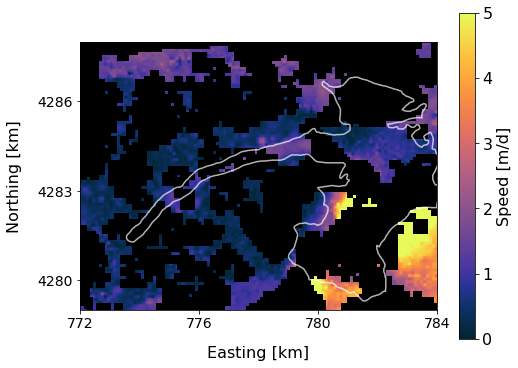

velocity_20200507_20200521_100m_PS.tif


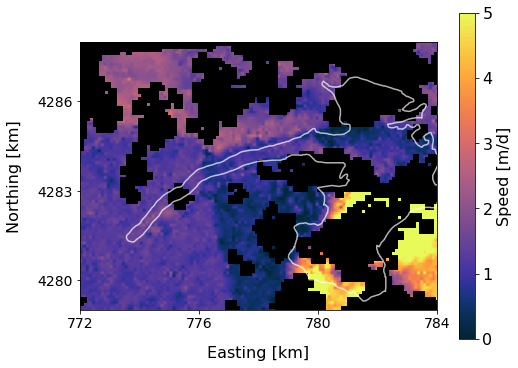

velocity_20200521_20200605_100m_PS.tif


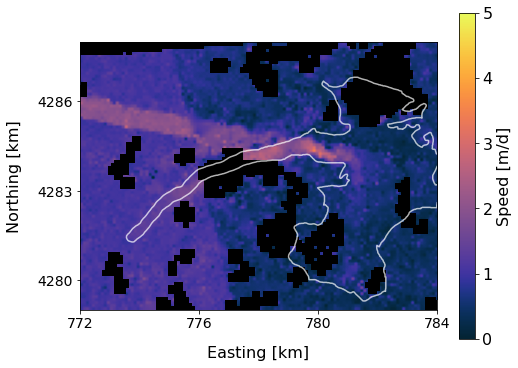

velocity_20200605_20200621_100m_PS.tif


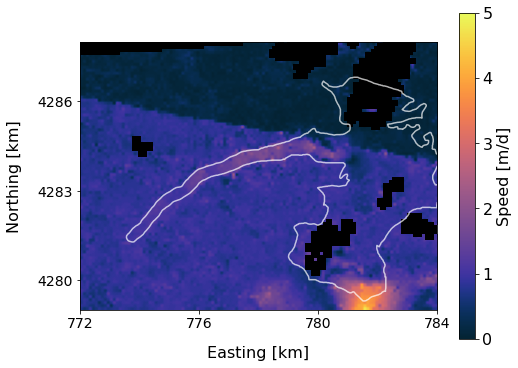

velocity_20200621_20200707_100m_PS.tif


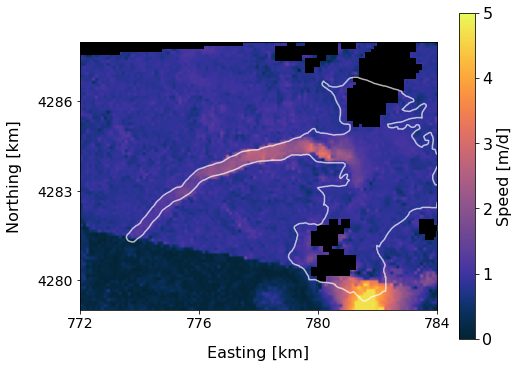

velocity_20200707_20200725_100m_PS.tif


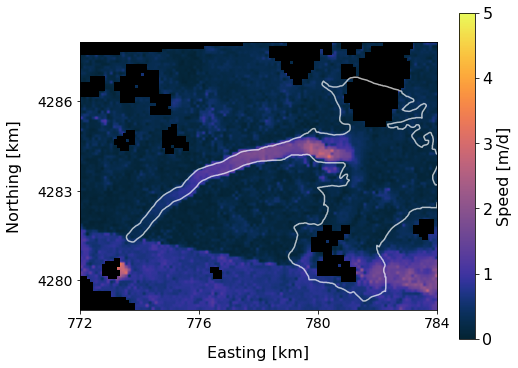

velocity_20200725_20200811_100m_PS.tif


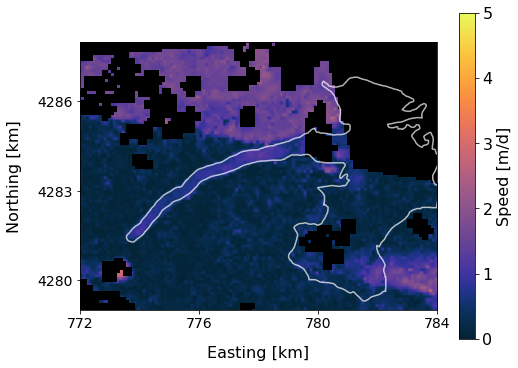

velocity_20200811_20200825_100m_PS.tif


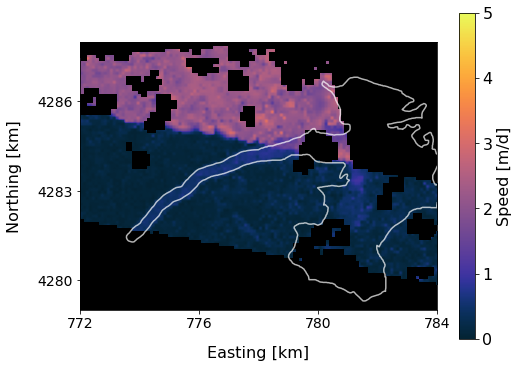

velocity_20200825_20200909_100m_PS.tif


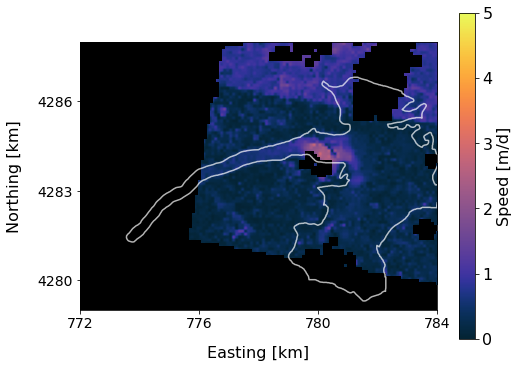

velocity_20200909_20200926_100m_PS.tif


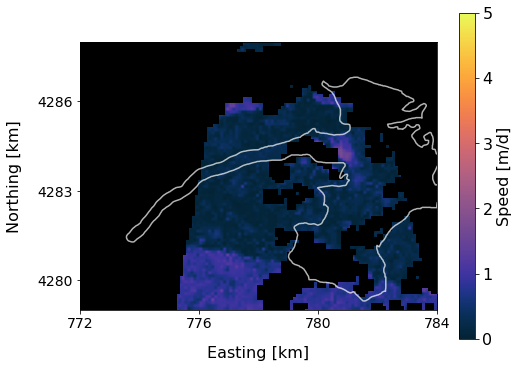

velocity_20200926_20201012_100m_PS.tif


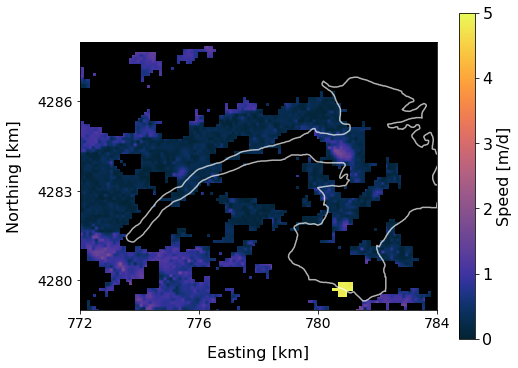

velocity_20201012_20201026_100m_PS.tif


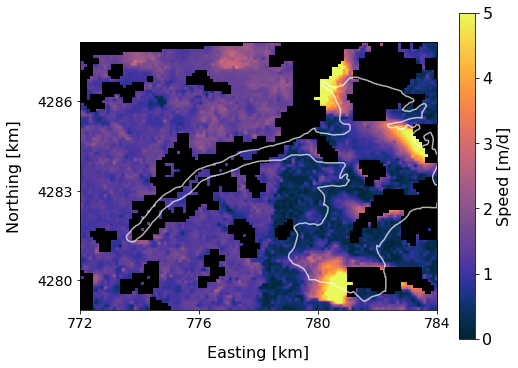

velocity_20201026_20201110_100m_PS.tif


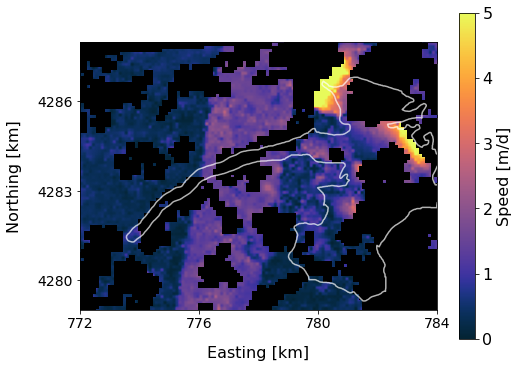

velocity_20201110_20201212_100m_PS.tif


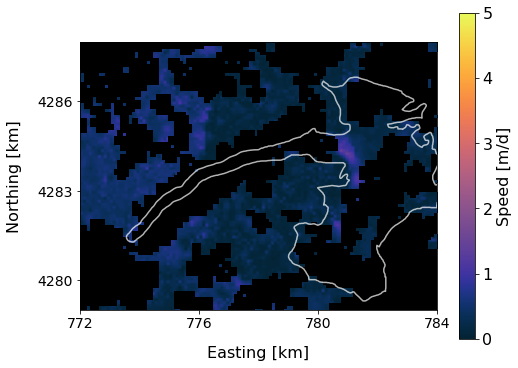

velocity_20201212_20201229_100m_PS.tif


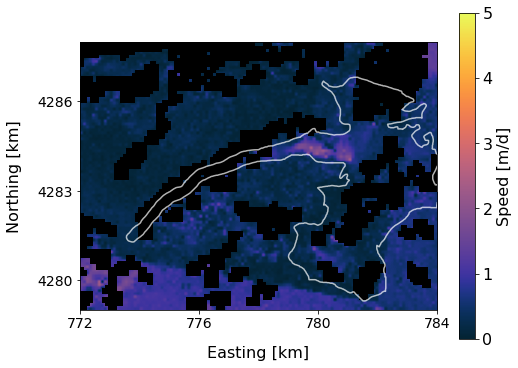

velocity_20201229_20210114_100m_PS.tif


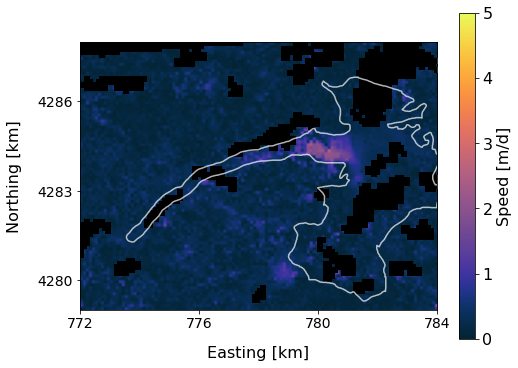

velocity_20210114_20210128_100m_PS.tif


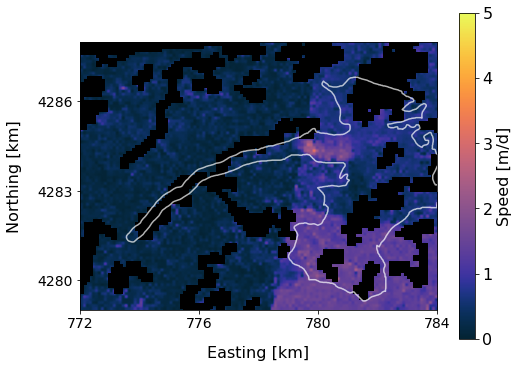

velocity_20210128_20210212_100m_PS.tif


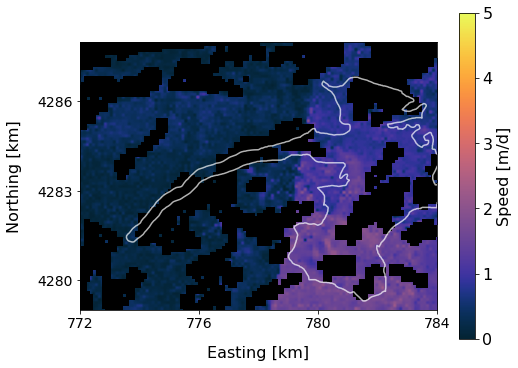

velocity_20210212_20210228_100m_PS.tif


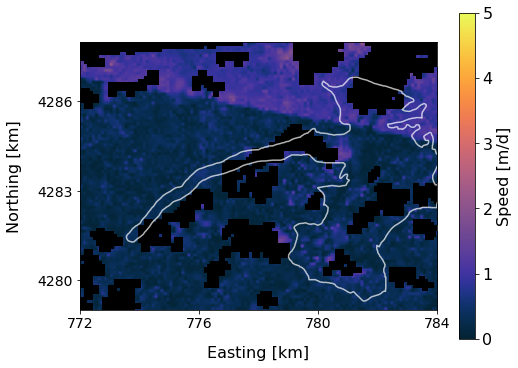

velocity_20210228_20210409_100m_PS.tif


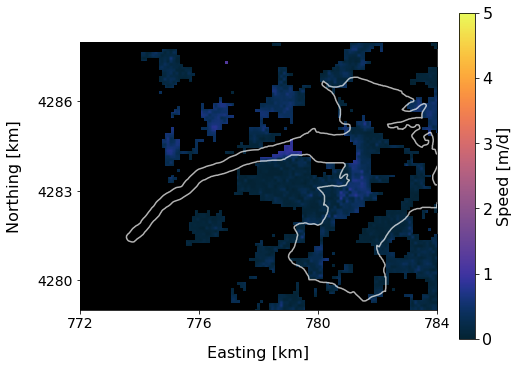

velocity_20210409_20210423_100m_PS.tif


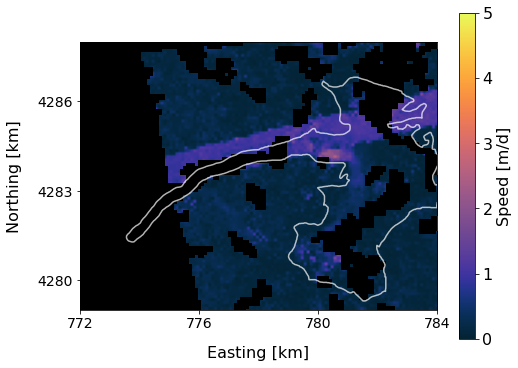

velocity_20210423_20210510_100m_PS.tif


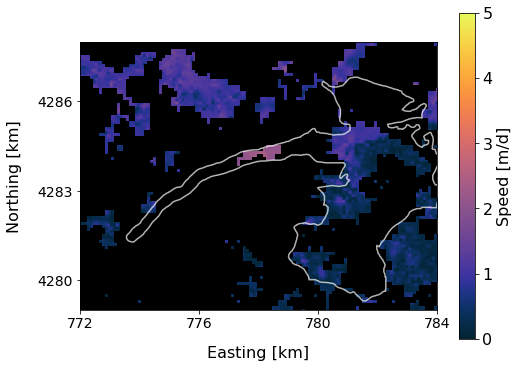

velocity_20210510_20210524_100m_PS.tif


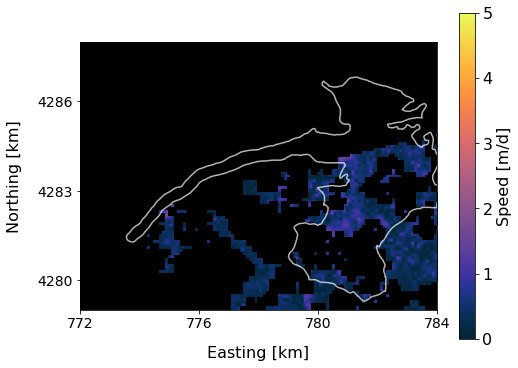

velocity_20210524_20210607_100m_PS.tif


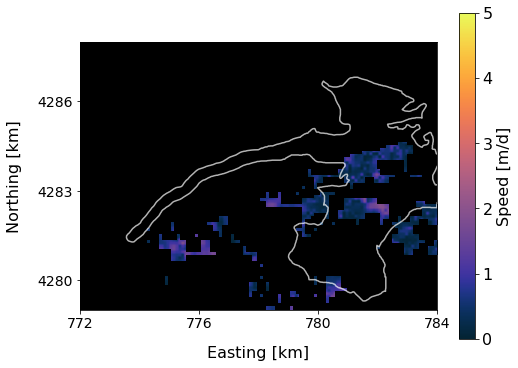

velocity_20210607_20210624_100m_PS.tif


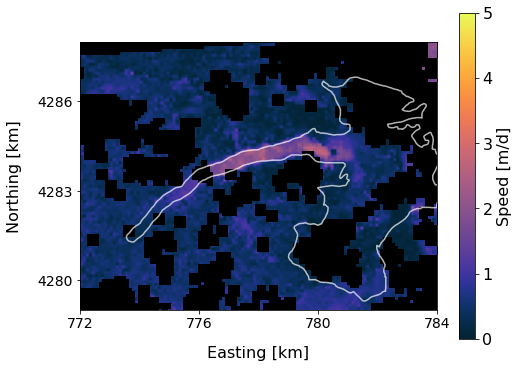

velocity_20210624_20210708_100m_PS.tif


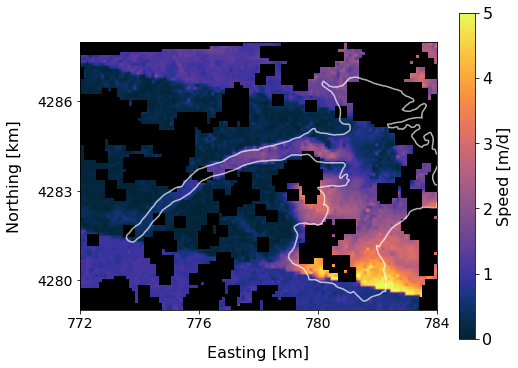

velocity_20210708_20210723_100m_PS.tif


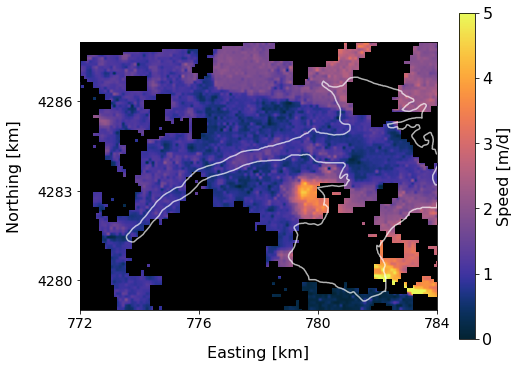

velocity_20210723_20210806_100m_PS.tif


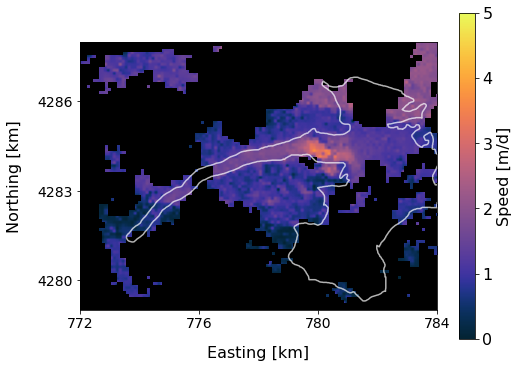

velocity_20210806_20210820_100m_PS.tif


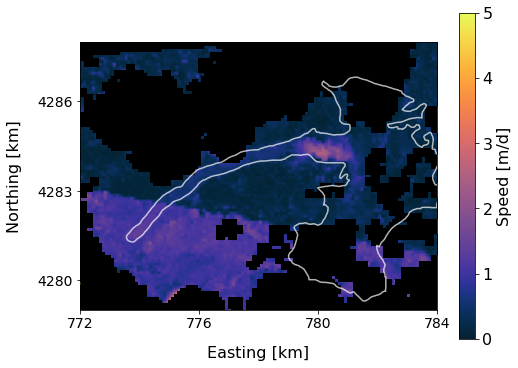

velocity_20210820_20210903_100m_PS.tif


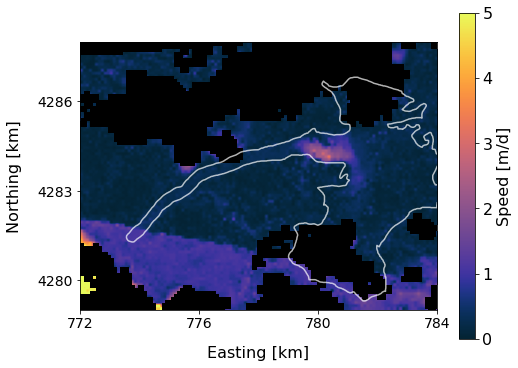

velocity_20210903_20210917_100m_PS.tif


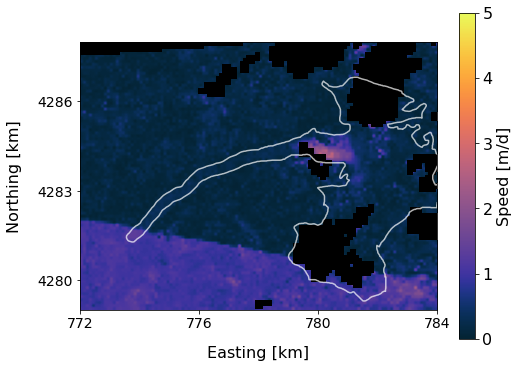

velocity_20210917_20211005_100m_PS.tif


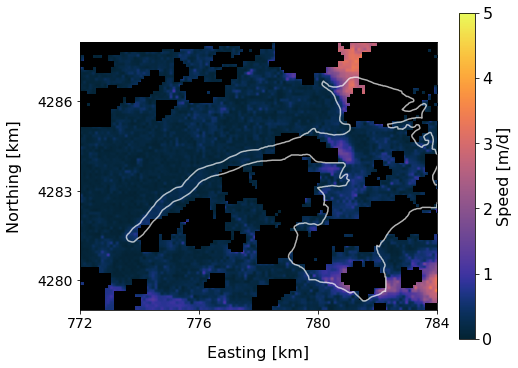

velocity_20211005_20211023_100m_PS.tif


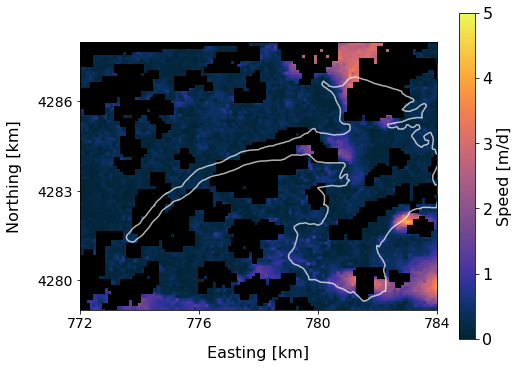

velocity_20211023_20211106_100m_PS.tif


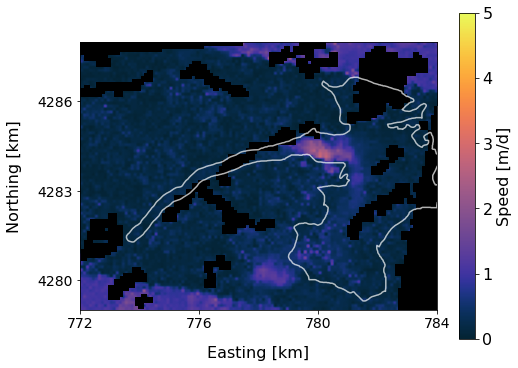

velocity_20211106_20211120_100m_PS.tif


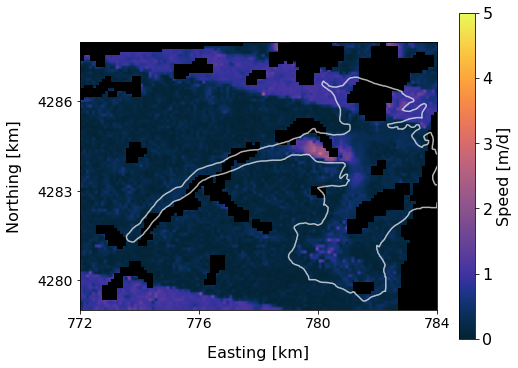

velocity_20211120_20211208_100m_PS.tif


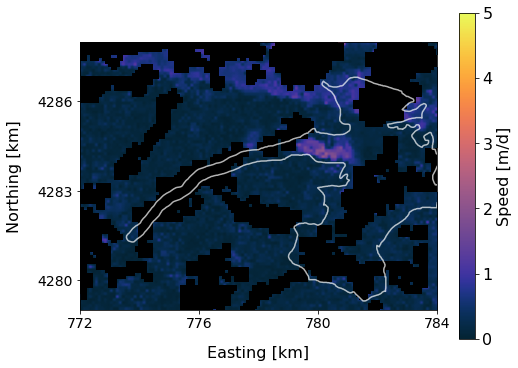

velocity_20211208_20211224_100m_PS.tif


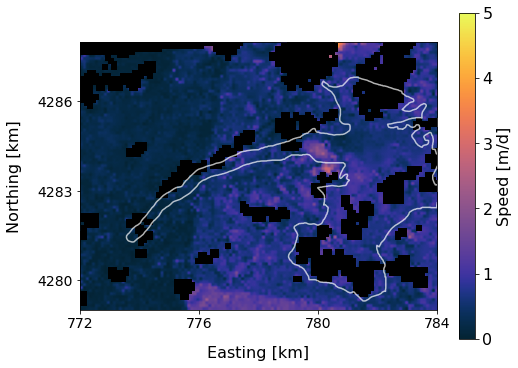

In [181]:
for file in filelist:
    # read in image
    PS_reader = rio.open(file); 
    print(file.split('/')[-1])
    window = from_bounds(left, bottom, right, top, PS_reader.transform)
        
        
    #planetscope
    fig, ax2 = plt.subplots(figsize=(8,6))
    im2 = ax2.imshow(PS_reader.read(window=window)[2]/365,cmap=cmocean.cm.thermal, 
                                vmin=0, vmax=5)
    
    ax2.plot(xs, ys, color='white',alpha=0.7) # add glacier shape
        
    # map:
    show(PS_reader.read(window=window)[2],
         transform = transform(window, PS_reader.transform), # use window transform
         cmap = cmocean.cm.thermal,
         vmin=0, vmax=5*365,
         ax=ax2)
    
    
    # manually set consistent tickmarks
    ax2.set_yticks(yticks_m); ax2.set_yticklabels(yticks_km)
    ax2.set_xticks(xticks_m); ax2.set_xticklabels(xticks_km)
    
#     ax2.set_title(file.split('/')[-1], fontsize=fs)
    cbar = fig.colorbar(im2, ax=ax2)
    ax2.set_facecolor('black')
    cbar.ax.tick_params(labelsize = fs)
    cbar.set_label('Speed [m/d]',fontsize=fs)
#     cbar.set_ticks([0,5,10,15,20])
    cbar.set_ticks([0,1,2,3,4,5])

    plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
    plt.tick_params(axis='both',labelsize=fs-2)
    plt.show()


In [101]:
# Import Velocity Rastors
S2_raster_path = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autorift/velocity_20200311_20200323_100m_S2.tif'
PS_raster_path = '/Volumes/SURGE_DISK/PS_downloads_SK/output_dt3to14/velocity_20200315_20200322_100m_PS.tif'

#sentinel2
S2_reader = rio.open(S2_raster_path);
S2r = S2_reader.read(3);

#planetscope
PS_reader = rio.open(PS_raster_path); 
PSr = PS_reader.read(3)

# Subtract The Rasters
difference_raster = (S2r - PSr)/S2r

/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_93097/3687284806.py:14: RuntimeWarning: divide by zero encountered in true_divide
  difference_raster = (S2r - PSr)/S2r


In [102]:
np.nanmin(difference_raster)/365

-inf

In [103]:
# # window bounds(UTM coordinates - SK):
left = 555800
right = 581000
top = 6.675e6
bottom = 6.650e6

# grab window into raster
window = from_bounds(left, bottom, right, top, S2_reader.transform) 

# manually set consistent tickmarks
yticks_m = np.array([6.655e6, 6.665e6, 6.675e6])
yticks_km = np.array(yticks_m/1000).astype(int)
xticks_m = np.array([560e3, 570e3, 580e3])
xticks_km = np.array(xticks_m/1000).astype(int)

print(difference_raster.shape)

# CROPPING
y1 = 75; y2 = y1+255
x1 = 100; x2 = 90+270
xticks_idx = np.array([43, 150, 248])
yticks_idx = np.array([205, 103, 0])

diff_cropped = difference_raster[y1:y2, x1:x2]
print(diff_cropped.shape)

(414, 416)
(255, 260)


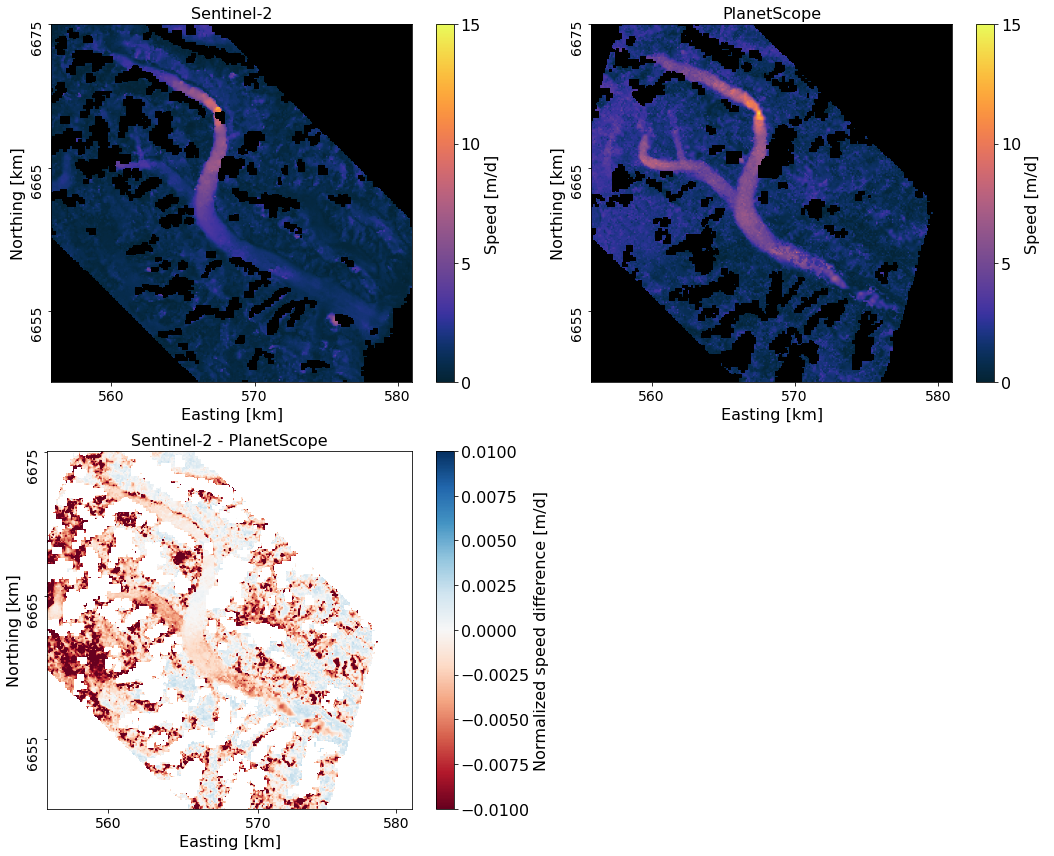

In [104]:
# Build Figures
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 12))

# Set the spacing between subplots
# plt.subplots_adjust(hspace=0.2)
VMAX=15

#sentinel 2
im1 = ax1.imshow(S2_reader.read(window=window)[2]/365,cmap=cmocean.cm.thermal, 
                            vmin=0, vmax=VMAX)
# map:
show(S2_reader.read(window=window)[2],
     transform = transform(window, S2_reader.transform), # use window transform
     cmap = cmocean.cm.thermal,
     vmin=0, vmax=VMAX*365,
     ax=ax1)
ax1.set_title('Sentinel-2', fontsize=fs)
cbar = fig.colorbar(im1,ax=ax1)
cbar1 = cbar.ax.tick_params(labelsize = fs)
cbar.set_ticks(np.arange(0,VMAX+1,5))
cbar.set_label('Speed [m/d]',fontsize=fs)

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('Easting [km]',fontsize=fs)
    ax.set_ylabel('Northing [km]',fontsize=fs)
    ax.tick_params(axis='both',labelsize=fs-2)
    
    # manually set consistent tickmarks
    ax.set_yticks(yticks_m); ax.set_yticklabels(yticks_km, rotation=90)
    ax.set_xticks(xticks_m); ax.set_xticklabels(xticks_km)
    ax.set_facecolor('black')


#planetscope
im2 = ax2.imshow(PS_reader.read(window=window)[2]/365,cmap=cmocean.cm.thermal, 
                            vmin=0, vmax=VMAX)
# map:
show(PS_reader.read(window=window)[2],
     transform = transform(window, PS_reader.transform), # use window transform
     cmap = cmocean.cm.thermal,
     vmin=0, vmax=VMAX*365,
     ax=ax2)
ax2.set_title('PlanetScope', fontsize=fs)
cbar = fig.colorbar(im2, ax=ax2)
cbar.ax.tick_params(labelsize = fs)
cbar.set_label('Speed [m/d]',fontsize=fs)
cbar.set_ticks(np.arange(0,VMAX+1,5))
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs-2)

#difference raster
im3 = ax3.imshow(diff_cropped/365,cmap='RdBu',vmin=-0.01, vmax=0.01)
ax3.set_xticks(xticks_idx); ax3.set_yticks(yticks_idx)
ax3.set_title('Sentinel-2 - PlanetScope', fontsize=fs)
ax3.set_yticklabels(yticks_km, rotation=90); ax3.set_xticklabels(xticks_km)
cbar = fig.colorbar(im3,ax=ax3)
cbar.ax.tick_params(labelsize = fs)
cbar.set_label('Normalized speed difference [m/d]',fontsize=fs)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15)
plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs-2)   
ax3.set_facecolor('white')

# Save the figure (one at a time)
ax4.axis('off')
plt.tight_layout()
# plt.savefig('/Users/maddiegendreau/Desktop/PS_S2_Velocity_Difference.png', dpi=300)
# plt.savefig(FIGPATH+'PS_S2_Velocity_Difference_.png',dpi=300)
plt.show()


## Generate errors violin plot - remove outliers from distribution

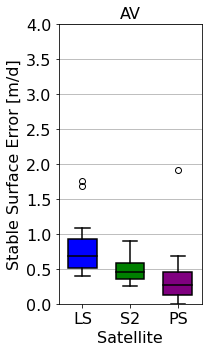

In [94]:
# Call in CSV files for all error data
error_data_path = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/error_csvs/'

# # Sit Kusa
# data1 = pd.read_csv(error_data_path+'SK/LS_Data.csv')['err_v']
# data3 = pd.read_csv(error_data_path+'SK/S2_Data.csv')['err_v']
# data4 = pd.read_csv(error_data_path+'SK/PS_new.csv')['err_v']

# AV
data_df = pd.read_csv(error_data_path+'AV_dt14to60.csv')
data_df = data_df[data_df.min_chip_size==100]
data1 = data_df[data_df.sat == 'LS']['err_v']
data4 = data_df[data_df.sat == 'PS']['err_v']
data3 = pd.read_csv(error_data_path+'AV_dt14to60_S2.csv')['err_v']

# # other sites
# data_df = pd.read_csv(error_data_path+'MZ_dt14to60.csv')
# data_df = data_df[data_df.min_chip_size==100]
# data1 = data_df[data_df.sat == 'LS']['err_v']
# data3 = data_df[data_df.sat == 'S2']['err_v']
# data4 = data_df[data_df.sat == 'PS']['err_v']


data = [data1, data3, data4]
data_vert = list(data1);
data_vert.extend(data3); data_vert.extend(data4); 

# set potions and labels for the data
positions = [1, 2, 3]
labels = ['LS', 'S2', 'PS']
colors = ['blue','green','purple']

# plot and save
fs = 16
lw=1.5
fig, ax = plt.subplots(figsize=(3,5))
# parts = ax.violinplot(data, positions=positions, # plot
#         showmeans=False, showmedians=False,
#         showextrema=True,showfliers=False)

parts = ax.boxplot(data, positions=positions, widths = 0.6 ,patch_artist=True, showfliers=True)

# colors/customization
cidx=0
for pc in parts['boxes']:
    pc.set_color('black')
    pc.set_linewidth(lw)
    cidx+=1
cidx=0
for pc in parts['medians']:
    pc.set_color('black')
    pc.set_linewidth(lw)
    cidx+=1
for pc in parts['caps']:
     pc.set_linewidth(lw)
for pc in parts['whiskers']:
     pc.set_linewidth(lw)
for pc in parts['fliers']:
     pc.set_linewidth(lw)
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)
# parts['cmins'].set_colors(['black','black','black'])
# parts['cmaxes'].set_colors(['black','black','black'])
# parts['cbars'].set_colors(['black','black','black'])

# quartile1=[]; medians=[]; quartile3=[]; whiskers_min=[]; whiskers_max=[]
# for dataset in [data1,data3,data4]:
#     q1, med, q3 = np.percentile(list(dataset), [25, 50, 75], axis=0)
#     quartile1.append(q1)
#     medians.append(med)
#     quartile3.append(q3)
# inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
# ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.set_xticks(positions)
ax.set_xticklabels(labels)

# general plot parameters
plt.xlabel('Satellite', fontsize=fs)
plt.ylabel('Stable Surface Error [m/d]', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.ylim(0,4)
plt.grid(axis='y')
plt.title('AV',fontsize=fs)
plt.tight_layout()
# Save the figure, you'll need to change the path to the desired figure location
plt.savefig(FIGPATH+'AV_error_boxplot_dt14to60.png', dpi=300)
plt.show()

## Create histograms of date separation

In [81]:
# Go to folder with the autoRIFT output tif files
# folder_path = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autoRIFT/'
folder_path = '/Volumes/SURGE_DISK/LO_autorift_output_dt5to60/'
# folder_path = '/Volumes/SURGE_DISK/PS_downloads_SK/output_dt5to60/'
prefix = "velocity"
suffix = "100m_PS.tif"

# Find the tif files you want to use
date_separations = []
months = []
for file in os.listdir(folder_path):
    if file.startswith(prefix) and file.endswith(suffix): # PS
        [pre, ds1, ds2, chipsize, sat] = file.split('_')
        
        if ds2.startswith('2020') or ds2.startswith('2021'):
            dt = pd.to_datetime(ds2) - pd.to_datetime(ds1)
            date_separations.append(dt.days)
            months.append(int(ds1[4:6]))
PS_df = pd.DataFrame(list(zip(date_separations, months)), columns=['dt','monthly'])
PS_df

dt  monthly
0    5        2
1   10        2
2   18        2
3   13        3
4    5        3
5    5        3
6    7        3
7   12        4
8   18        4
9    6        5
10   5        5
11   7        5
12  11        5
13   9        6
14  11        6
15   7        6
16   5        6
17  11        7
18  20        7
19  17        8
20  12        8
21   9        9
22   7        9
23  21        9
24   6       10
25   5       10
26  12       10
27   8       11
28   6        2
29   5        2
30   9        2
31  10        2
32   5        3
33   7        3
34   8        3
35  22        3
36   5        4
37  10        4
38  17        4
39  15        5
40   7        6
41   5        6
42   6        6
43   8        6
44   6        6
45  16        7
46  11        7
47   8        7
48   8        8
49   7        8
50   8        8
51   8        8
52   7        9
53   5        9
54   6        9
55  20        9
56   6       10
57   7       10
58   7       10
59   9       11

In [82]:
# # FOR S2, L8:
# Go to folder with the autoRIFT output tif files
# folder_path = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autoRIFT/'
# prefix = "velocity"

# Find the tif files you want to use
date_separations = []
months = []
for file in os.listdir(folder_path):
    if file.startswith(prefix) and (file.endswith('100m_S2.tif') or 
                                    file.endswith('100m_LS.tif')): # S2 and LS
        [pre, ds1, ds2, chipsize, sat] = file.split('_')
        
        if ds2.startswith('2020') or ds2.startswith('2021'):
            dt = pd.to_datetime(ds2) - pd.to_datetime(ds1)
            date_separations.append(dt.days)
            months.append(int(ds1[4:6]))
S2_L8_df = pd.DataFrame(list(zip(date_separations, months)), columns=['dt','monthly'])
S2_L8_df = S2_L8_df[S2_L8_df.dt >=5]
S2_L8_df

dt  monthly
0   10        1
1    5        2
2   22        2
3   13        2
4    7        3
..  ..      ...
82   7        6
83  16        6
84  16        7
85  39        9
86  41       11

[87 rows x 2 columns]

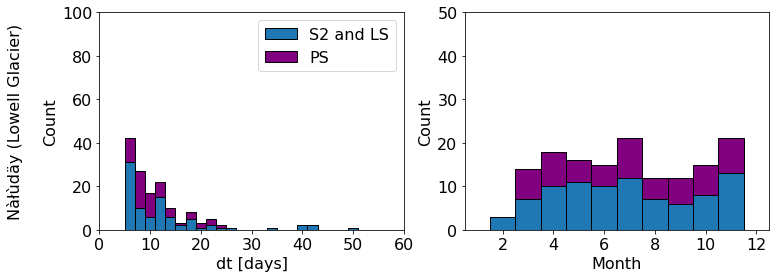

In [85]:
PScount, PSbins = np.histogram(PS_df.dt,bins=np.arange(0,60,2))
S2LScount, S2LSbins = np.histogram(S2_L8_df.dt,bins=np.arange(0,60,2))

PSmonths, bins = np.histogram(PS_df.monthly,bins=np.arange(0,12,1))
S2LSmonths, bins = np.histogram(S2_L8_df.monthly,bins=np.arange(0,12,1))

fs=16
fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,4))
ax.bar(S2LSbins,np.insert(S2LScount,0,0),width=2,edgecolor='k')
ax.bar(PSbins, np.insert(PScount,0,0), bottom = np.insert(S2LScount,0,0),color='purple',width=2,edgecolor='k')
ax.set_xlim(0,60)
ax.set_ylim(0,100)
ax.legend(['S2 and LS','PS'],loc='upper right',fontsize=fs)
ax.set_xlabel('dt [days]', fontsize=fs); ax.set_ylabel("Nàłùdäy (Lowell Glacier)\n\nCount", fontsize=fs)
ax.tick_params(labelsize=fs)


ax2.bar(bins,np.insert(S2LSmonths,0,0),width=1,edgecolor='k')
ax2.bar(bins, np.insert(PSmonths,0,0), bottom = np.insert(S2LSmonths,0,0),color='purple',width=1,edgecolor='k')
ax2.tick_params(labelsize=fs)
ax2.set_xlabel('Month', fontsize=fs)
ax2.set_ylabel('Count', fontsize=fs)
ax2.set_xlim(0.5,12.5)
ax2.set_ylim(0,50)

# ax.set_title('Date separation',fontsize=fs)
# ax2.set_title('Monthly coverage',fontsize=fs)
plt.show()

[ 0  0  0  0  0 43 14 17  8  5  1  3  2  1  1  0  1  0  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [205]:
# # plot histogram
# fs = 14
# alpha=0.75
# fig, (ax,ax2) = plt.subplots(2,1,figsize=(8,12))
# ax.hist(S2_L8_df.dt,bins=np.arange(0,60,2),alpha=alpha)
# ax.hist(PS_df.dt,bins=np.arange(0,60,2),facecolor='purple',alpha=alpha)
# ax.set_xlim(0,60)
# ax.legend(['S2 and LS','PS'],loc='upper right',fontsize=fs)
# # ax.ylim(0,0.13)
# ax.set_xlabel('Date separation [days]', fontsize=fs); ax.set_ylabel('Count', fontsize=fs)
# ax.tick_params(labelsize=fs)

# ax2.hist(S2_L8_df.monthly,bins=np.arange(1,12,1),align='left',alpha=alpha)
# ax2.hist(PS_df.monthly,bins=np.arange(1,12,1),align='left',facecolor='purple',alpha=alpha)
# ax2.set_xlim(0,12.5)
# ax2.set_xticks(np.arange(1,13,1))
# ax2.tick_params(labelsize=fs)
# # plt.ylim(0.5,12)
# plt.xlabel('Month', fontsize=fs); plt.ylabel('Count', fontsize=fs)

# plt.tight_layout()
# plt.savefig(FIGPATH+'MZ_histogram_comparison.png',dpi=300)
# # plt.savefig(FIGPATH+'SR_histogram_dt_PS.png',dpi=300)
# plt.show()

In [206]:
# # plot histogram
# fs = 14
# plt.figure(figsize=(8,6))
# plt.hist(months,bins=np.arange(1,12,1),edgecolor='black',align='left')
# # plt.hist(months,bins=np.arange(1,12,1),edgecolor='black',align='left',facecolor='purple')
# plt.xlim(0,12.5)
# plt.xticks(np.arange(1,13,1))
# plt.tick_params(labelsize=fs)
# # plt.ylim(0.5,12)
# plt.xlabel('Month', fontsize=fs); plt.ylabel('Count', fontsize=fs)
# plt.tight_layout()
# plt.savefig(FIGPATH+'SR_histogram_month_S2_L8.png',dpi=300)
# # plt.savefig(FIGPATH+'SR_histogram_month_PS.png',dpi=300)
# plt.show()

# Plot all image availability

In [186]:
# folder with all the monthly folders
basepath = '/Volumes/SURGE_DISK/PS_downloads_LO/'

dfs = []
for folder in os.listdir(basepath):
    if folder.startswith('2'):
        for file in os.listdir(basepath+folder):
            if file == 'image_availability_summary.csv':
                month_df = pd.read_csv(basepath+folder+'/'+file)
                dfs.append(month_df)
all_df = pd.concat(dfs)
all_df.dates = pd.to_datetime(all_df.dates, format='%Y%m%d')
all_df

Unnamed: 0      dates  tiles  sats
0            0 2021-07-01      7     1
1            1 2021-07-02      9     2
2            2 2021-07-03     18     3
3            3 2021-07-04     12     3
4            4 2021-07-05     14     3
..         ...        ...    ...   ...
19          19 2021-08-23     16     4
20          20 2021-08-25      3     1
21          21 2021-08-29     20     5
22          22 2021-08-30     15     3
23          23 2021-08-31     25     6

[518 rows x 4 columns]

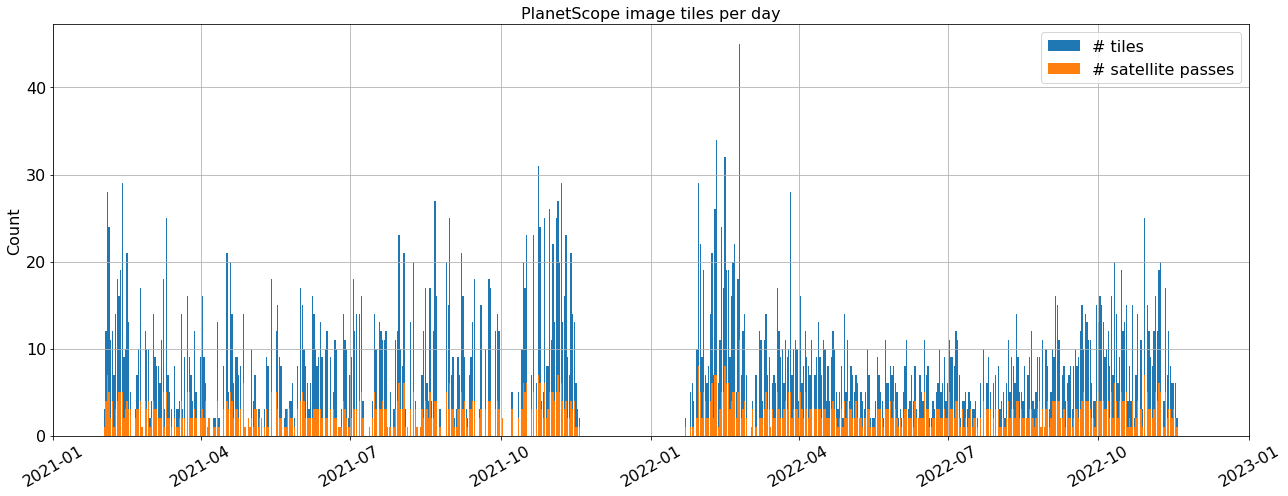

In [187]:
# plot
fs = 16
plt.figure(figsize=(18,7))
plt.bar(all_df.dates, all_df.tiles)
plt.bar(all_df.dates, all_df.sats)
plt.xlim(datetime(2021,1,1), datetime(2023,1,1))
plt.xticks(rotation=30,fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.title('PlanetScope image tiles per day',fontsize=fs)
plt.legend(['# tiles','# satellite passes'],fontsize=fs)
plt.grid()
plt.tight_layout()
plt.savefig(FIGPATH+'image_availability_summary_LO.png', dpi=300)# export graph as img png
plt.show()

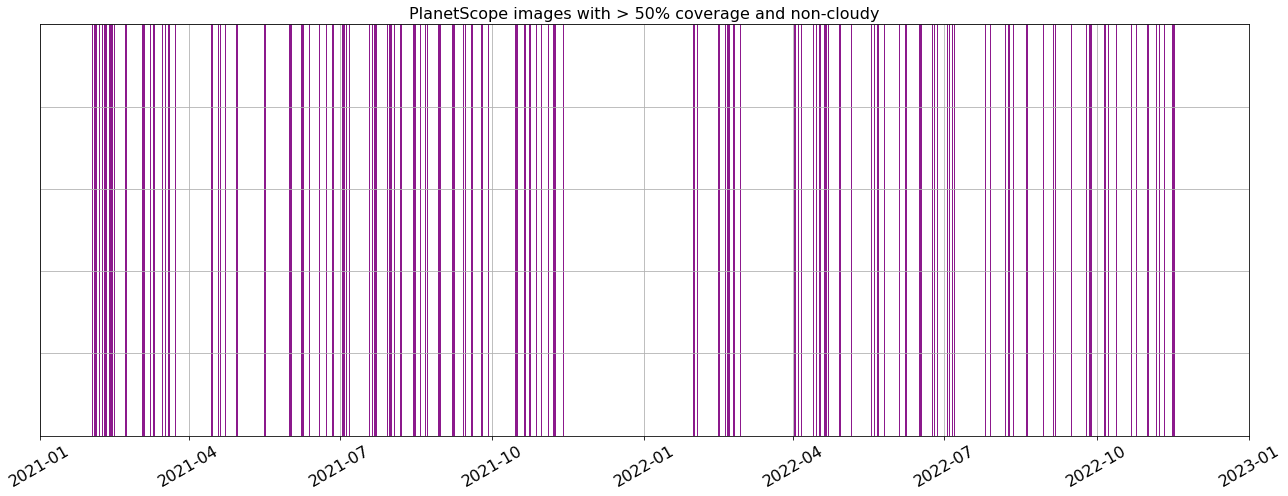

In [189]:
# replot with final cloudy images
dates = []
for file in os.listdir('/Volumes/SURGE_DISK/PS_downloads_LO/noncloudy/'):
# for file in os.listdir('/Volumes/SURGE_DISK/PS_downloads_SK/PS_noncloudy_SK/'):
    if file.startswith('PS') and file.endswith('.tif'):
        dates.append(file.split('_')[1])
noncloudy_df = pd.DataFrame(list(zip(dates, np.ones(len(dates)))), columns=['date','number'])
noncloudy_df['datetime'] = pd.to_datetime(noncloudy_df.date,format='%Y%m%d')
noncloudy_df.to_csv(FIGPATH+'PS_noncloudy_images_LO.csv')

plt.figure(figsize=(18,7))
plt.bar(noncloudy_df.datetime, noncloudy_df.number,color='purple',alpha=0.9)
plt.xlim(datetime(2021,1,1), datetime(2023,1,1))
plt.xticks(rotation=30,fontsize=fs)
plt.tick_params(labelleft=False,left=False)
# plt.yticks(fontsize=fs)

plt.ylim(0,1)
# plt.ylabel('Count',fontsize=fs)
plt.title('PlanetScope images with > 50% coverage and non-cloudy',fontsize=fs)
plt.grid()
plt.tight_layout()
plt.savefig(FIGPATH+'PS_noncloudy_images_LO.png', dpi=300)# export graph as img png
plt.show()

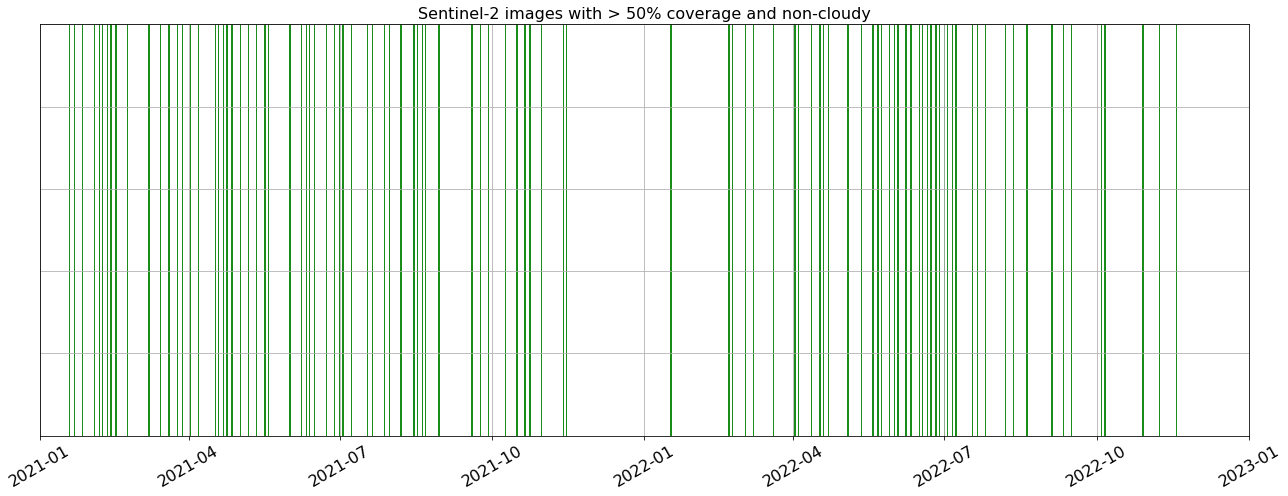

In [182]:
# make equivalent plot for Sentinel-2
dates = []
for file in os.listdir('/Volumes/SURGE_DISK/S2_LO/'):
# for file in os.listdir('/Users/jukesliu/Documents/TURNER/DATA/IMAGERY/sentinel2/'):
    if file.startswith('S2') and file.endswith('clipped.tif'):
        dates.append(file.split('_')[2])
noncloudy_df = pd.DataFrame(list(zip(dates, np.ones(len(dates)))), columns=['date','number'])
noncloudy_df['datetime'] = pd.to_datetime(noncloudy_df.date,format='%Y%m%d')
noncloudy_df.to_csv(FIGPATH+'S2_noncloudy_images_LO.csv')

plt.figure(figsize=(18,7))
plt.bar(noncloudy_df.datetime, noncloudy_df.number,color='green',alpha=0.9)
plt.xlim(datetime(2021,1,1), datetime(2023,1,1))
plt.xticks(rotation=30,fontsize=fs)
plt.tick_params(labelleft=False,left=False)
# plt.yticks(fontsize=fs)

plt.ylim(0,1)
# plt.ylabel('Count',fontsize=fs)
plt.title('Sentinel-2 images with > 50% coverage and non-cloudy',fontsize=fs)
plt.grid()
plt.tight_layout()
plt.savefig(FIGPATH+'S2_noncloudy_images_LO.png', dpi=300)# export graph as img png
plt.show()

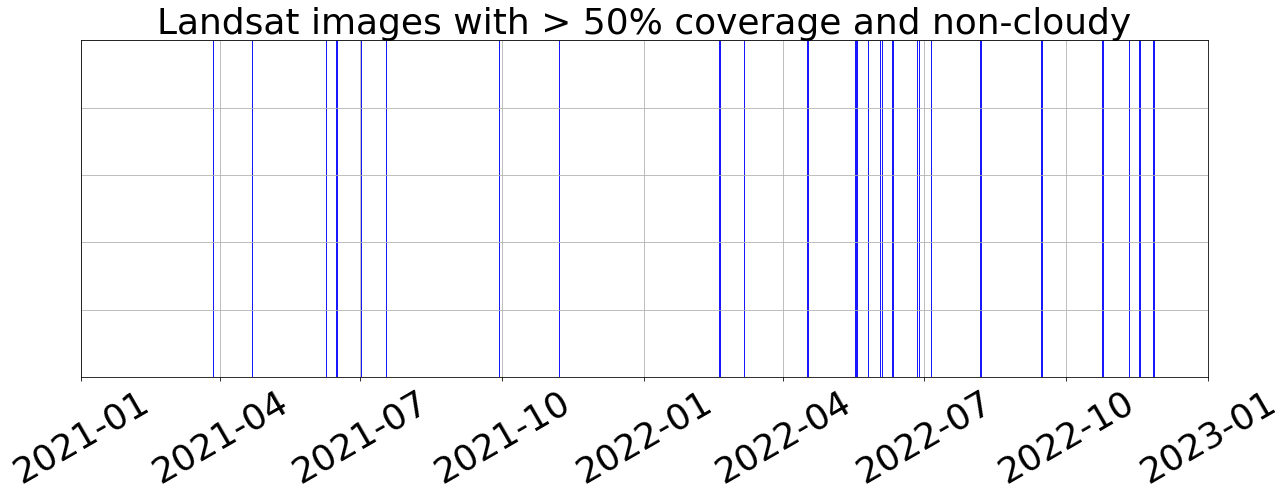

In [191]:
# make equivalent plot for Landsat
dates = []
# for file in os.listdir('/Users/jukesliu/Documents/TURNER/DATA/IMAGERY/LS8images/useable_images/'):
for file in os.listdir('/Volumes/SURGE_DISK/LS_LO/'):
    if file.startswith('L') and file.endswith('.TIF'):
        dates.append(file.split('_')[3])
noncloudy_df = pd.DataFrame(list(zip(dates, np.ones(len(dates)))), columns=['date','number'])
noncloudy_df['datetime'] = pd.to_datetime(noncloudy_df.date,format='%Y%m%d')
noncloudy_df.to_csv(FIGPATH+'LS_noncloudy_images_LO.csv')

plt.figure(figsize=(18,7))
plt.bar(noncloudy_df.datetime, noncloudy_df.number,color='blue',alpha=0.9)
plt.xlim(datetime(2021,1,1), datetime(2023,1,1))
plt.xticks(rotation=30,fontsize=fs)
plt.tick_params(labelleft=False,left=False)
# plt.yticks(fontsize=fs)

plt.ylim(0,1)
# plt.ylabel('Count',fontsize=fs)
plt.title('Landsat images with > 50% coverage and non-cloudy',fontsize=fs)
plt.grid()
plt.tight_layout()
plt.savefig(FIGPATH+'LS_noncloudy_images_LO.png', dpi=300)# export graph as img png
plt.show()

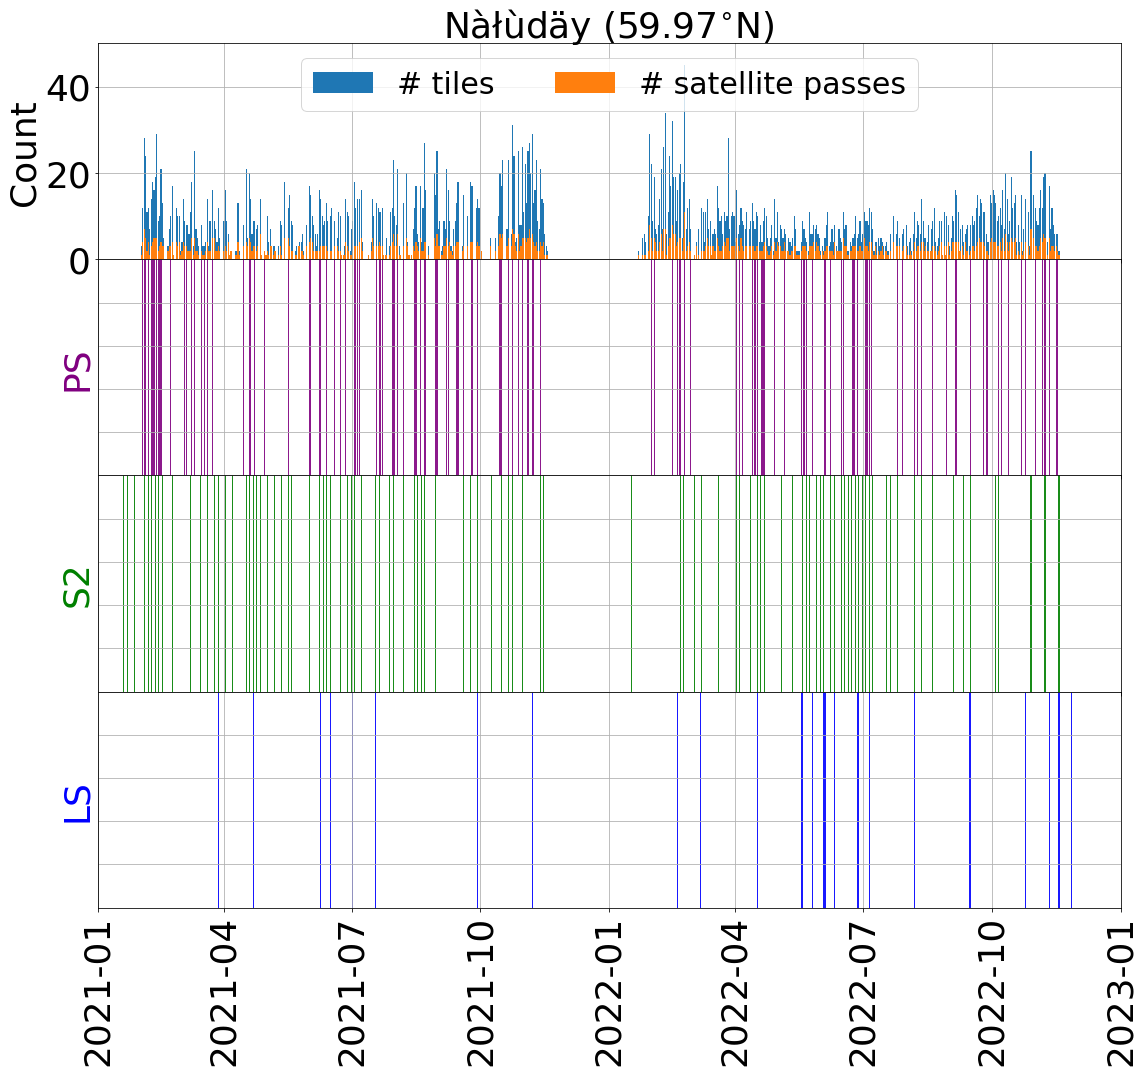

In [192]:
# make all into a big barplot
fs=36
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(16,15),sharex=True)

# ax1 tile availability
ax1.bar(all_df.dates, all_df.tiles)
ax1.bar(all_df.dates, all_df.sats)
ax1.set_ylabel('Count',fontsize=fs)
ax1.legend(['# tiles','# satellite passes'],loc='upper center',ncol=2,fontsize=fs-6)
ax1.grid()
ax1.set_ylim(0,50)
ax1.tick_params(labelsize=fs)

# ax2
PS_df = pd.read_csv(FIGPATH+'PS_noncloudy_images_LO.csv')
ax2.bar(pd.to_datetime(PS_df.datetime, format='%Y-%m-%d'), PS_df.number, color='purple',alpha=0.9)
ax2.set_ylabel('PS',fontsize=fs, color='purple')

# ax3
S2_df = pd.read_csv(FIGPATH+'S2_noncloudy_images_LO.csv')
ax3.bar(pd.to_datetime(S2_df.datetime, format='%Y-%m-%d'), S2_df.number, color='green',alpha=0.9)
ax3.set_ylabel('S2',fontsize=fs, color='green')

# ax4
LS_df = pd.read_csv(FIGPATH+'LS_noncloudy_images_LO.csv')
ax4.bar(pd.to_datetime(LS_df.datetime, format='%Y-%m-%d'), LS_df.number, color='blue',alpha=0.9)
ax4.set_ylabel('LS',fontsize=fs, color='blue')

for ax in [ax2, ax3, ax4]:
    ax.grid()
    ax.set_ylim(0,1)
    ax.tick_params(labelleft=False,left=False)
    
plt.xlim(datetime(2021,1,1), datetime(2023,1,1))
plt.xticks(fontsize=fs, rotation=90)
ax1.set_title("Nàłùdäy (59.97$^{\circ}$N)",fontsize=fs)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig(FIGPATH+'image_availability_allsats_LO.png', dpi=300)# export graph as img png
plt.show()